In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [53]:
# Lista de dados lidos do arquivo pkl
data_list = []
pkl_file_path = 'C:\\Users\\pves\\Documents\\Voxar_Contexto\\Workspace\\Deep_Learning\\Projeto\\deep-learn-anomaly-detection\\data\\pickle_files\\'
sampling_freq_audio = 20000
sampling_freq_vibration = 1000

In [54]:
files = os.listdir(pkl_file_path)
pickle_files = []
for file in files:
    if ('.pkl' in file):
        pickle_files.append(file)

print(len(pickle_files))

22


In [90]:
# Funçoes de leitura do arquivo picke
def load_pkl(file_name):
    with open(file_name, 'rb') as pk:
        try:
            lists = pickle.load(pk)

            return lists
        except EOFError:
            pk.close()

            return None
        
def calc_time(sample, freq):
    return np.linspace( 
        0, 
        float(len(sample)) / freq, 
        num = len(sample) 
    )

# Define window size and overlap
def stft(signal, freq):
    # Divide o sinal em janelas
    stft = np.fft.fft(signal, axis=1)
    freqs = np.fft.fftfreq(len(signal), d=1/freq)
    #stft = np.abs(stft.T)[0:int(len(signal)//2)]
    #freqs = freqs[0:int(len(signal)//2)]
    return stft, freqs

In [91]:
# Process each file and stores in the datalist
# datalist - > lista com os 22 arquivos de motor 
for i in range(len(pickle_files)):
    file_pkl = '{}'.format(pickle_files[i])
    pkl = load_pkl(pkl_file_path + file_pkl)
    if (pkl != None):
        data_list.insert(i, pkl)

In [92]:
print(len(data_list))
print(data_list[0][0].keys())

66
dict_keys(['date_time', 'temperature', 'noise_amb', 'noise_eng', 'gyr_x', 'gyr_y', 'gyr_z', 'acc_x', 'acc_y', 'acc_z'])


In [93]:
dict_list = data_list[0]
print(len(dict_list))
sample = dict_list[0]
print(len(sample['acc_x']))

250
1000


Descrição do dicionário
Temperatura - > escalar (float)
Data_time: String com a data e a hora de aquisição
noise_amb -> leitura do sensor de audio ambiente (500 amostras - serie temporal)
noise_eng - > leitura do sensor de audio motor (500 amostras - serie temporal)
gyr_x, y, z - > leitura do eixo-x do giroscópio (1000 amostras - série temporal)
acc_x, y, z -> leitura do eixo-x do acelerômetro (1000 amostras - série temporal)


IndexError: tuple index out of range

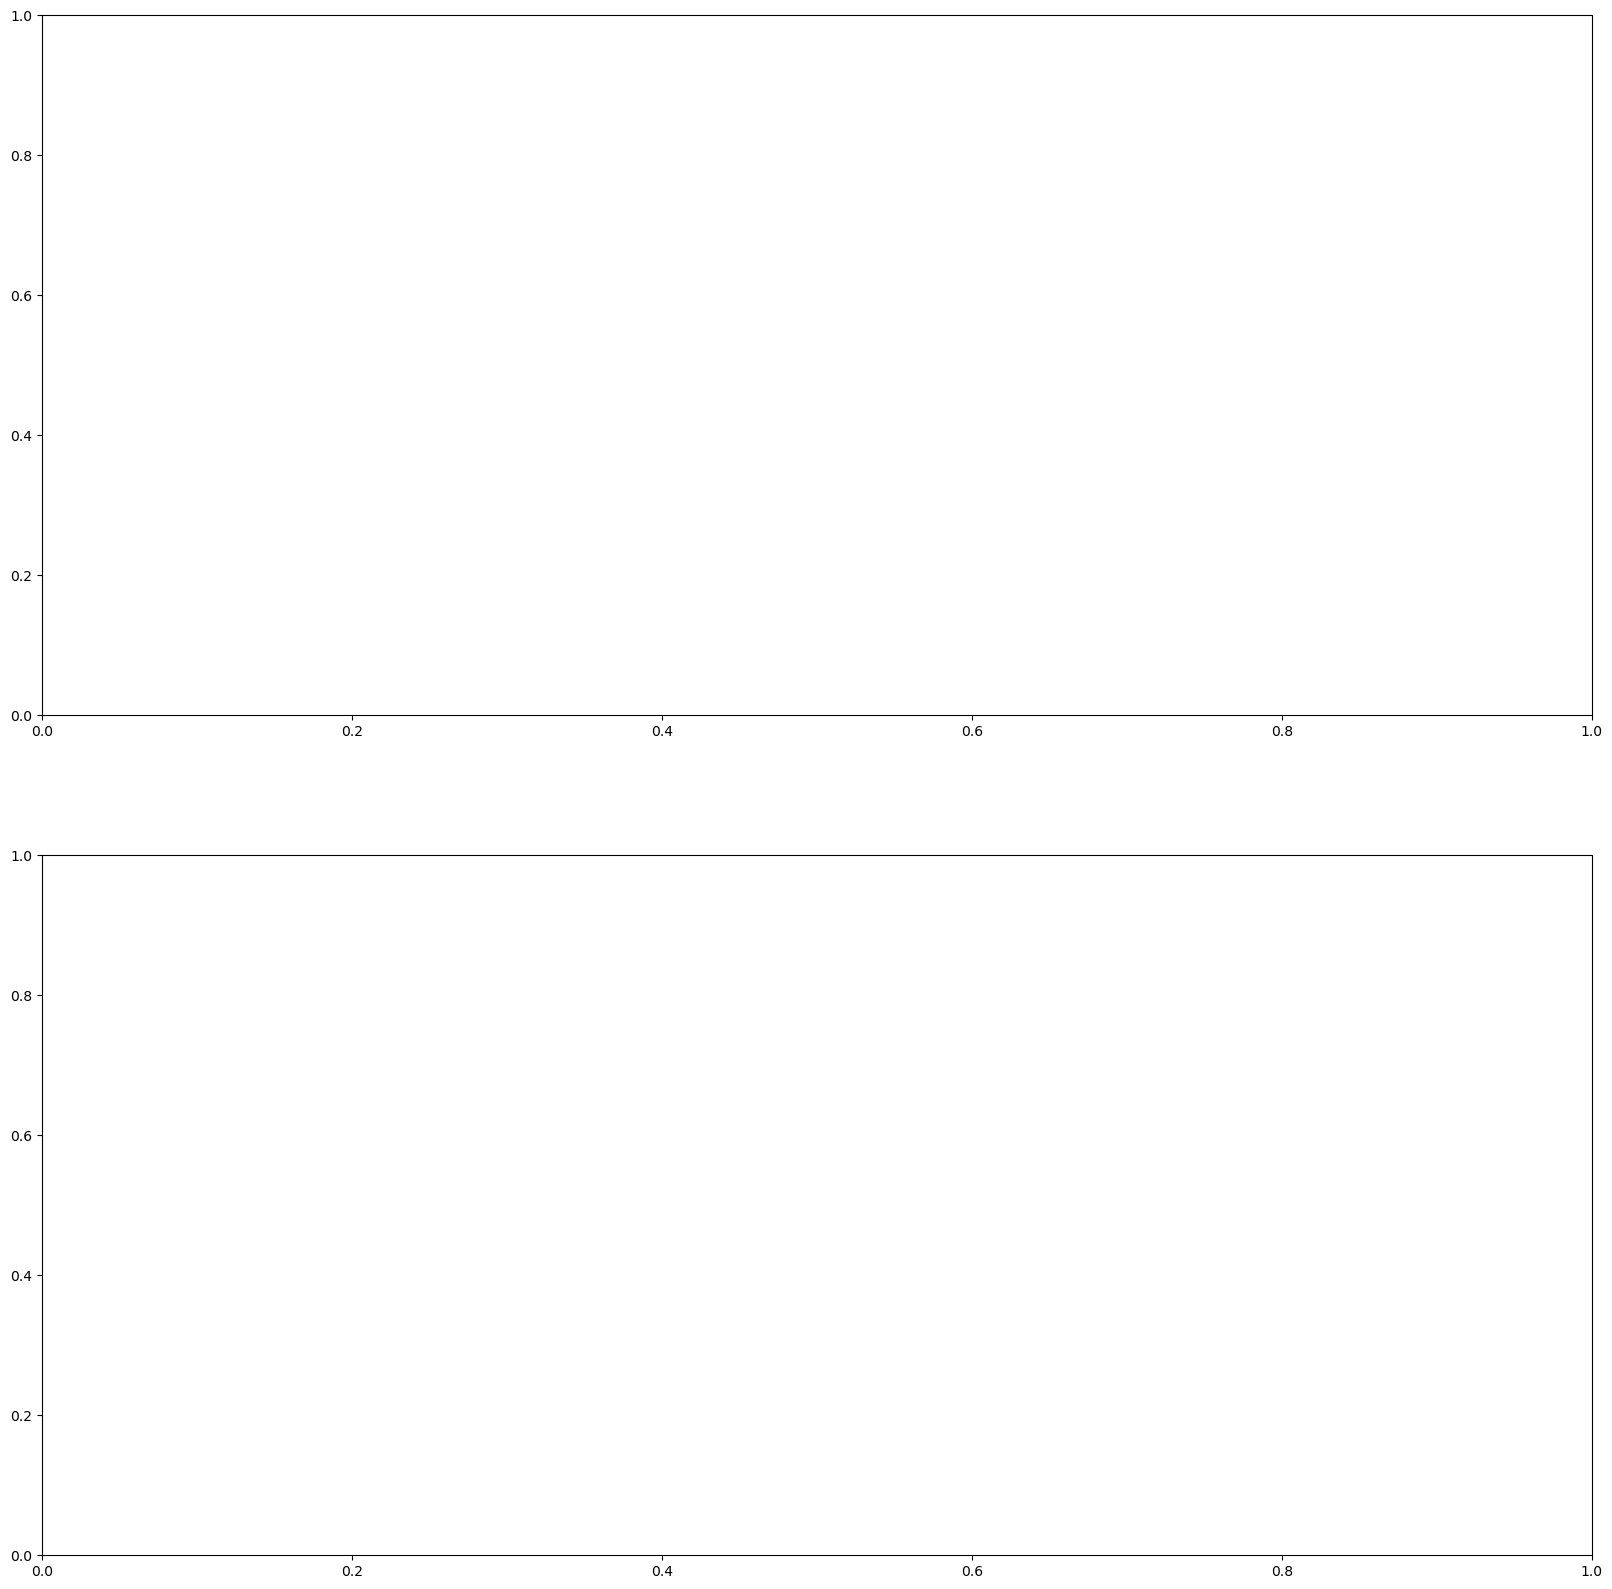

In [106]:
# O Motor 1 compreende o intervalo de 0 ao 6
# Anomalia: 0-2 - Azul
# Normal: 3 - 6 - Vermelho

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,20))

for i in range(len(data_list)):
    color = 'b'
    label = 'Anomaly'

    if (i > 2):
        color = 'r'
        label = 'Normal'

    for idx, sample_dict in enumerate(data_list[i]):
        amb_noise = sample_dict['noise_amb']
        time = calc_time(amb_noise, sampling_freq_audio)
        amb_fft, amb_freq = stft(amb_noise, sampling_freq_audio)
        ax1.plot(time, amb_noise, color=color, label=label)
        #ax2.plot(amb_freq, amb_fft)
        
        if (idx == 2):
            break
        
    if (i == 6):
        break

plt.legend()
plt.show()